## The Project's Target
There are many financial companies and institutions that provide loans to individuals. 
One of their most important goals is to ensure that people who have taken a loan will make their payments and repay the loans in full. 
Machine learning can help identify individuals who are at high risk and may not be able to repay the loans they have taken. 
Based on this information, decisions can be made regarding who should be given loans and how to mitigate risk by obtaining suitable guarantees from the borrowers, or whether to deny loans to individuals that the machine learning model identifies as having a high level of risk.

This dataset has been taken from Coursera's Loan Default Prediction Challenge and will provide you the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. The dataset contains 255,347 rows and 18 columns in total.

## Granting A Loan Classification using Python

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score,precision_score, accuracy_score

In [53]:
sb.set()

In [54]:
df = pd.read_csv('loan.csv')
df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [55]:
df.drop('LoanID', axis=1, inplace=True)

## Let’s have a look at the information and the describe about the columns in the dataset

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


## Checking if there is null in the data set

In [58]:
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

The target of the data: 1: high probability that the borrower will not repay the loan, 0: high probability that the borrower will repay the loan

In [59]:
df.Default.value_counts(normalize=True)

0    0.883872
1    0.116128
Name: Default, dtype: float64

In [60]:
df.Default.value_counts()

0    225694
1     29653
Name: Default, dtype: int64

## Data Exploration
The dataset has many features that can train a Machine Learning model for getting a loan classification. Let’s explore all the features one by one.

I will start by exploring the Age feature to know if the Age of the person affects the person's risk level.

<Axes: xlabel='Age', ylabel='Count'>

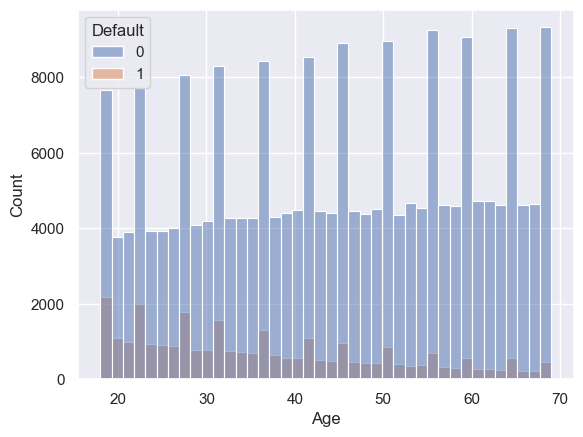

In [61]:
sb.histplot(data=df,x='Age', hue='Default',bins=40 )
# Loan Risk Based On Age

We can see that the younger a person takes out a loan, the higher their level of risk.

<Axes: xlabel='Income', ylabel='Count'>

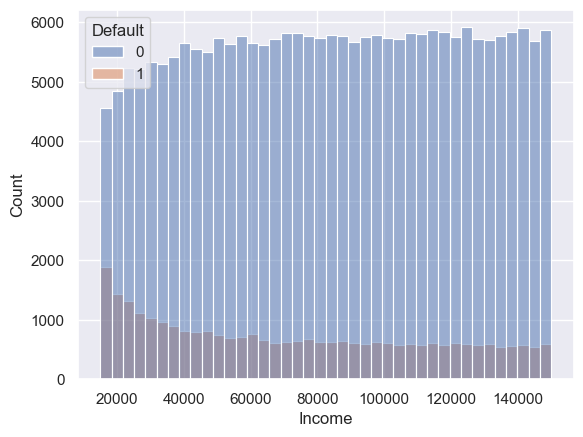

In [10]:
sb.histplot(data=df,x='Income', hue='Default',bins=40 )
# Loan Risk Based On Annual Income

According to the above visualization, people earning between $20,000 and $50,000 per year have a higher level of risk compared to those earning more than $50,000 per year.

<Axes: xlabel='LoanAmount', ylabel='Count'>

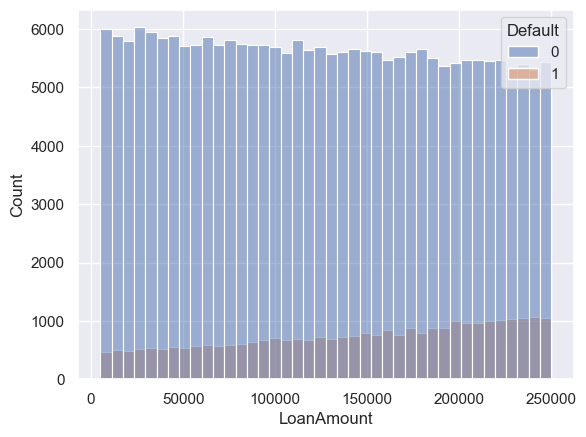

In [11]:
sb.histplot(data=df,x='LoanAmount', hue='Default',bins=40 )
# Loan Risk Based On Loan Amount

According to the above visualization, the higher the loan, the higher the risk

<Axes: xlabel='CreditScore', ylabel='Count'>

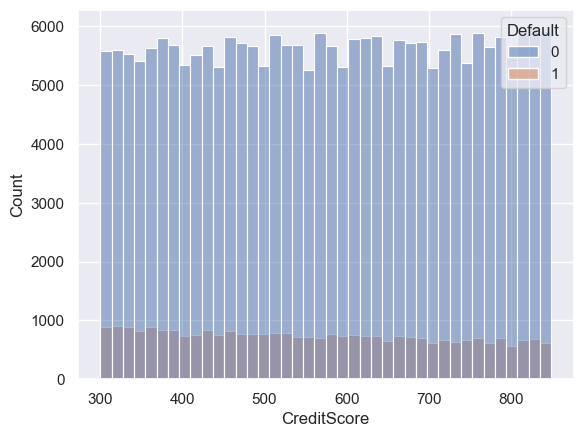

In [12]:
sb.histplot(data=df,x='CreditScore', hue='Default',bins=40 )
# Loan Risk Based On Credit Score

According to the above visualization, There’s not much difference in the loan risk of all Credit Score in the data.

<Axes: xlabel='MonthsEmployed', ylabel='Count'>

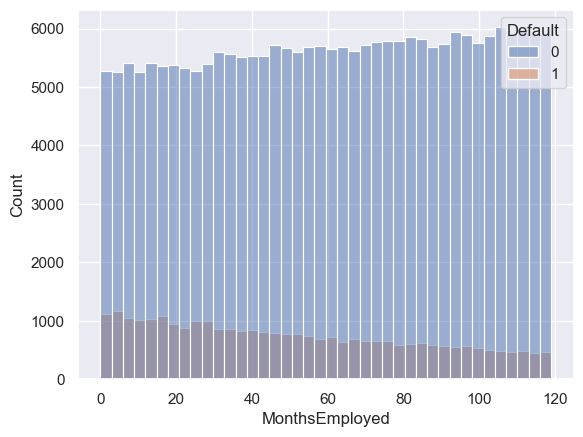

In [13]:
sb.histplot(data=df,x='MonthsEmployed', hue='Default',bins=40 )
# Loan Risk Based On Months Employed

According to the visualization above, the fewer months the person has worked, the higher his risk

In [14]:
df.LoanTerm.unique()

array([36, 60, 24, 48, 12], dtype=int64)

<Axes: xlabel='LoanTerm', ylabel='Count'>

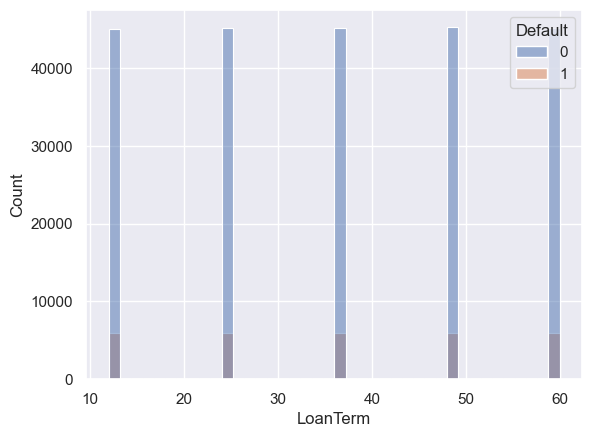

In [24]:
sb.histplot(data=df,x='LoanTerm', hue='Default',bins=40)
# Loan Risk Based On Loan Term (the term lengh of the loan in month) 
            

According to the above visualization, There’s not much difference in the loan risk of all Loan Teame (the term lengh of the loan in month) feature in the data.

<Axes: xlabel='DTIRatio', ylabel='Count'>

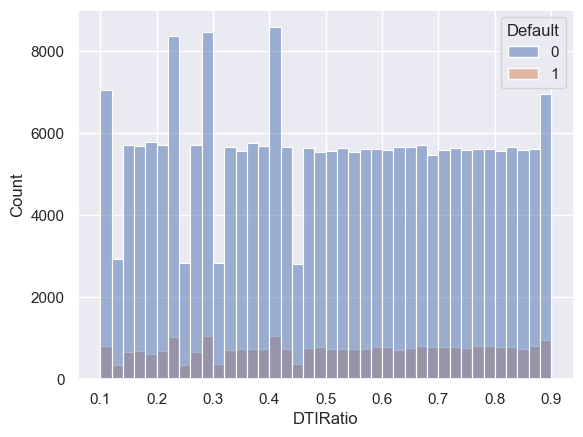

In [25]:
sb.histplot(data=df,x='DTIRatio', hue='Default',bins=40)
# Loan Risk Based On DTIRatio (The Debt-to-Income ratio feature)

According to the above visualization, There’s not much difference in the loan risk of all The Debt-to-Income ratio feature in the data.

<Axes: xlabel='NumCreditLines', ylabel='Count'>

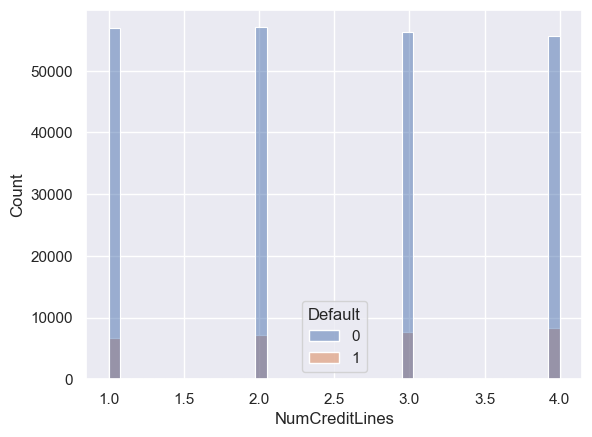

In [15]:
sb.histplot(data=df,x='NumCreditLines', hue='Default',bins=40)
# Loan Risk Based On DTIRatio (The Debt-to-Income ratio feature)

According to the above visualization, The feature NumCreditLinesNumCreditLines has no effect on the target

<Axes: xlabel='InterestRate', ylabel='Count'>

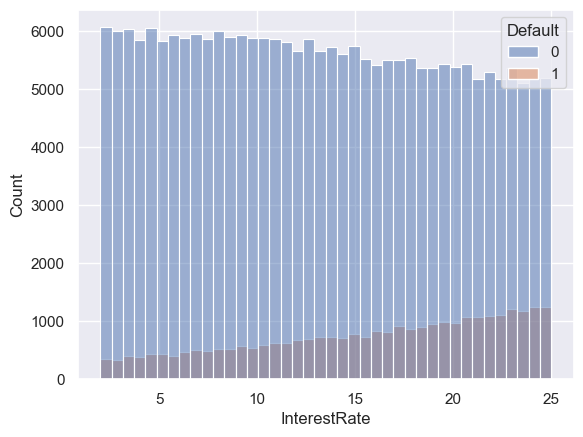

In [16]:
sb.histplot(data=df,x='InterestRate', hue='Default',bins=40)
# Loan Risk Based On InterestRate feature

The higher the interest on the loan, the greater the chance that the loan will not be repaid

In [95]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,0,0,0,0,0
1,69,50432,124440,458,15,1,4.81,60,0.68,1,0,1,1,1,0,0,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,1,0,0,0,1,1,1
3,32,31713,44799,743,0,3,7.07,24,0.23,2,0,1,1,1,2,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,1,0,1,0,1,1,0


In [64]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,0,0,0,0,0
1,69,50432,124440,458,15,1,4.81,60,0.68,1,0,1,1,1,0,0,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,1,0,0,0,1,1,1
3,32,31713,44799,743,0,3,7.07,24,0.23,2,0,1,1,1,2,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,1,0,1,0,1,1,0


After a check I made regarding the categorical variables that do not affect the target, 
I will split the data into features and labels by selecting the features we found important for our model:

## Unbalanced Data
Because the data is not balanced and there is only 11% data with label 1, the data should be balanced

After a check I made regarding the categorical variables that do not affect the target, 
I will split the data into features and labels by selecting the features we found important for our model:

In [96]:
from imblearn.over_sampling import SMOTE

In [126]:
X = df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed','NumCreditLines','DTIRatio',
     'InterestRate', 'LoanTerm']]
y = df['Default']

In [98]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [100]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     74459
           1       0.98      0.87      0.92     74500

    accuracy                           0.93    148959
   macro avg       0.93      0.93      0.93    148959
weighted avg       0.93      0.93      0.93    148959



In [102]:
confusion_matrix(y_test,model.predict(X_test))

array([[73262,  1197],
       [ 9801, 64699]], dtype=int64)

In [113]:
X.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,DTIRatio,InterestRate,LoanTerm
0,56,85994,50587,520,80,4,0.44,15.23,36
1,69,50432,124440,458,15,1,0.68,4.81,60


In [124]:
feature =np.array([[23, 85000, 220000,350, 75,1,0.8,7.54, 30]])

In [125]:
model.predict(feature)

array([1])

## In summary, I created a model that can predict whether a customer taking a loan will repay it or not. The model has an Recall rate of 87% in identifying whether the loan will be repaid or not. The total accuracy is 93% 